# importing labraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
df_train=pd.read_csv('Google_Stock_Price_Train.csv')
df_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [18]:
training_set=df_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [19]:
training_set.shape

(1258, 1)

# data preprocessing

In [20]:
## normalize the dataset
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [21]:
training_set_scaled.shape

(1258, 1)

In [22]:
#splitting data
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

len(X_train)

1198

In [23]:
len(y_train)

1198

In [24]:
X_train,y_train=np.array(X_train),np.array(y_train)
#reshaping
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [25]:
X_train[:,:,:]

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

# Creating the Stock Price Prediction model

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout 

In [27]:
 #initialize the RNN
regressor=Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#adding the output layer
regressor.add(Dense(units=1))

print(regressor.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [29]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fit the model to the training data
history=regressor.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
38/38 [==============================] - 63s 262ms/step - loss: 0.0044
Epoch 2/30
38/38 [==============================] - 10s 272ms/step - loss: 0.0031
Epoch 3/30
38/38 [==============================] - 11s 285ms/step - loss: 0.0032
Epoch 4/30
38/38 [==============================] - 12s 308ms/step - loss: 0.0023
Epoch 5/30
38/38 [==============================] - 11s 298ms/step - loss: 0.0029
Epoch 6/30
38/38 [==============================] - 11s 280ms/step - loss: 0.0027
Epoch 7/30
38/38 [==============================] - 11s 288ms/step - loss: 0.0029
Epoch 8/30
38/38 [==============================] - 12s 306ms/step - loss: 0.0027
Epoch 9/30
38/38 [==============================] - 12s 326ms/step - loss: 0.0028
Epoch 10/30
38/38 [==============================] - 11s 293ms/step - loss: 0.0027
Epoch 11/30
38/38 [==============================] - 11s 301ms/step - loss: 0.0027
Epoch 12/30
38/38 [==============================] - 11s 288ms/step - loss: 0.0024
Epoch 13/30
3

In [30]:
#test data
data_test=pd.read_csv('Google_Stock_Price_Test.csv')
real=data_test.iloc[:,1:2].values

In [34]:
dataset_total = pd.concat((df_train['Open'], data_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_test) - 60:].values

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [35]:
X_test.shape

(20, 60, 1)

In [36]:
predicted_stock_price = regressor.predict(X_test)

# Reshape predicted_stock_price
predicted_stock_price_reshaped = predicted_stock_price.reshape(-1, 1)

# Perform inverse_transform
predicted_stock_price_scaled = sc.inverse_transform(predicted_stock_price_reshaped)

predicted_stock_price_scaled[:20,].shape

1/1 [==============================] - 14s 14s/step


(20, 1)

In [37]:
real.shape

(20, 1)

In [38]:
from sklearn.metrics import mean_squared_error
#mean_squared_error
mse = mean_squared_error(real, predicted_stock_price_scaled[:20,])
print("Mean Squared Error:", mse)

Mean Squared Error: 230.2857790549935


In [41]:
#evaluate model
training_loss=history.history['loss']

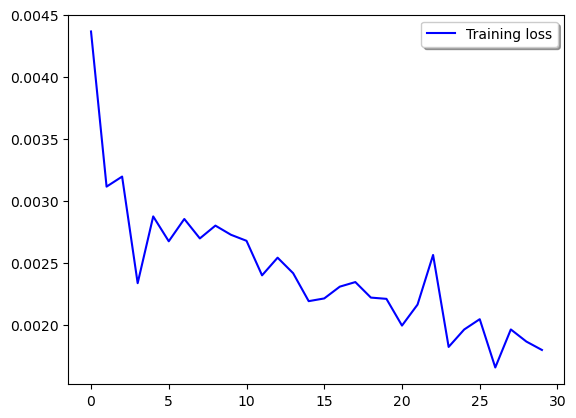

In [46]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots()
ax.plot(history.history['loss'], color='b', label="Training loss")
legend = ax.legend(loc='best', shadow=True)


# Plotting the predictions and real data

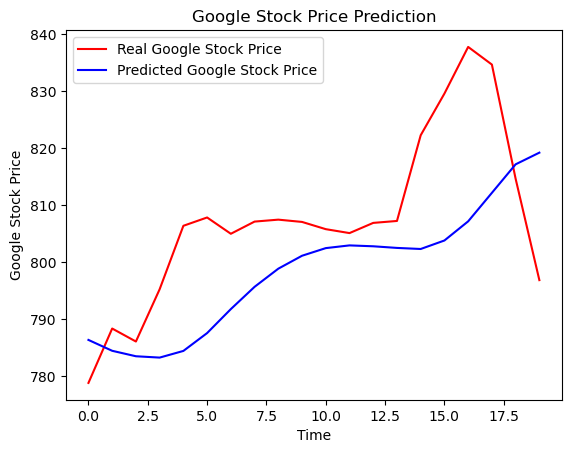

In [47]:
plt.plot(real, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_scaled[:20,], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()